In [234]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [235]:
# read whale_returns into dataframes 
whale_returns_csv = Path("whale_returns.csv")
#whale_returns = pd.read_csv(whale_returns_csv)
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [236]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [237]:
whale_returns.sort_index(inplace = True)

In [238]:
 # Determining number of nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [239]:
# Use the `dropna` function to drop whole records that have at least one null value
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [240]:
 # Determining number of nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [241]:
# read whale_returns into dataframes 
sp_tsx_history_csv = Path("sp_tsx_history.csv")
#whale_returns = pd.read_csv(whale_returns_csv)
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [242]:
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [243]:
sp_tsx_history.dtypes

Close    object
dtype: object

In [244]:
#strip_commas = object.replace("$", "")
sp_tsx_history.head()
sp_tsx_history['Close'] =sp_tsx_history['Close'].str.replace("$","").str.replace(",","").astype(float)


In [245]:
sp_tsx_history.dtypes

Close    float64
dtype: object

In [246]:
# Calculate Daily Returns 
sp_tsx_history=sp_tsx_history.pct_change()
sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [247]:
# Drop nulls
sp_tsx_history.isnull().sum()

Close    1
dtype: int64

In [248]:
 # Rename `Close` Column to be specific to this portfolio.
print(sp_tsx_history.rename({'S&P TSX 60': 'Close'}))

               Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1818 rows x 1 columns]


In [249]:
# read algo_returns into dataframes 
algo_returns_csv = Path("algo_returns.csv")
#algo_returns = pd.read_csv(algo_returns_csv)
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [250]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [251]:
algo_returns.sort_index(inplace = True)

In [252]:
 # Determining number of nullsz

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [253]:
# Use the `dropna` function to drop whole records that have at least one null value
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [254]:
 # Determining number of nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [255]:
combined_df = pd.concat([whale_returns,algo_returns,sp_tsx_history], axis="columns", join="inner")
#combined_df.setindex('Date')

In [256]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# Rename the columns to match the corresponding stock
combined_df.columns = ['SOROS FUND MANAGEMENT', 'PAUL & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'ALGO 1', 'ALGO 2', 'S&P']
combined_df.head()
combined_df

,SOROS FUND MANAGEMENT,PAUL & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [257]:
#Performance Analysis 
# Plot daily returns of all portfolios
print(combined_df.pct_change())

            SOROS FUND MANAGEMENT  PAUL & CO.INC.  \
Date                                                
2015-03-03                    NaN             NaN   
2015-03-04              -2.762070       -1.650792   
2015-03-05               0.800968        0.257544   
2015-03-06              -2.968465       -1.876837   
2015-03-09              -1.073656       -2.182252   
...                           ...             ...   
2019-04-25              -1.124733       -2.279801   
2019-04-26             -29.607053       -8.097525   
2019-04-29              -0.846082       -0.703202   
2019-04-30              -2.032021       -1.813282   
2019-05-01               3.516783       -0.393524   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    ALGO 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                     4.113646               -1.641381  3.422374   
20

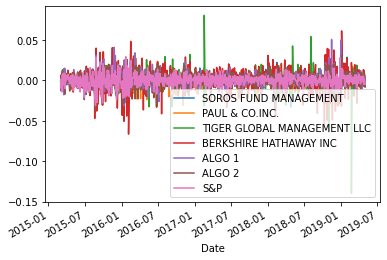

In [258]:
 # Calculate cumulative returns of all portfolios
 # Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
combined_df.plot()

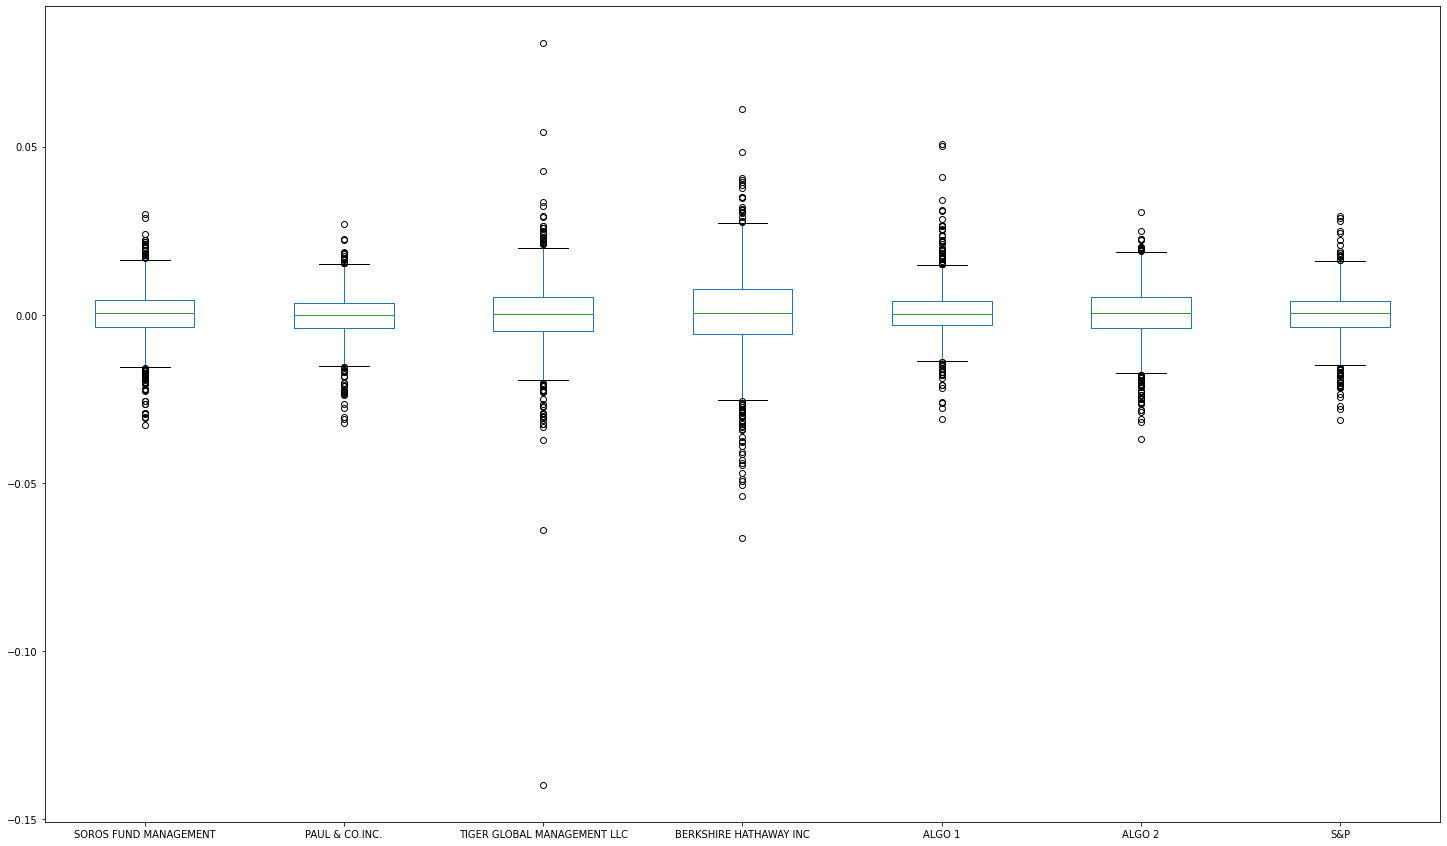

In [275]:
#Risk Analysis 
 # Box plot to visually show risk
ax = combined_df.plot.box(figsize=(25,15));


In [277]:
#Calculate the standard deviation for each portfolio.
#S&P 
combined_df.std()

SOROS FUND MANAGEMENT          0.007828
PAUL & CO.INC.                 0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
ALGO 1                         0.007589
ALGO 2                         0.008326
S&P                            0.007034
dtype: float64

In [262]:
#Determine which portfolios are riskier than the S&P TSX 60
#All portfolios higher than S&P are riskier than S&P. In this case all portfolio except Paul & Co. are riskier. 

In [306]:
#Calculate the Annualized Standard Deviation.




In [264]:
#Calculate the annualized standard deviation (252 trading days).

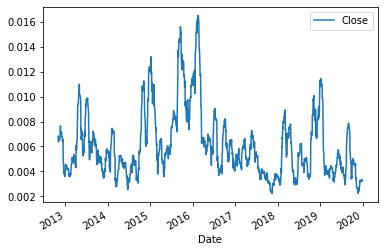

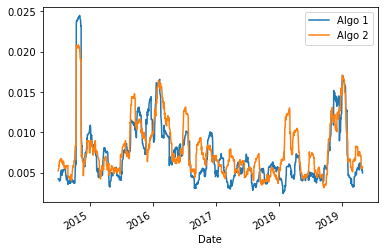

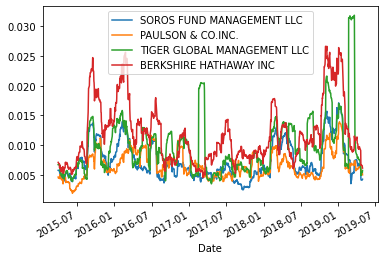

In [265]:
#Rolling Statistics 
#Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 using a 21 day rolling window. Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
sp_tsx_history.rolling(window=21).std().plot()
algo_returns.rolling(window=21).std().plot()
whale_returns.rolling(window=21).std().plot()

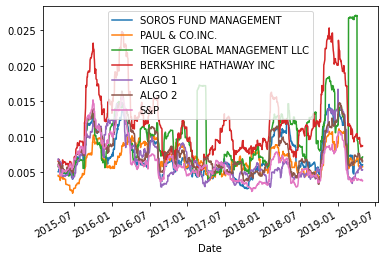

In [266]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=30).std().plot()

In [281]:
#Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.



combined_corr=combined_df.corr()
combined_corr.head()

,SOROS FUND MANAGEMENT,PAUL & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,S&P
SOROS FUND MANAGEMENT,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAUL & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
ALGO 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276


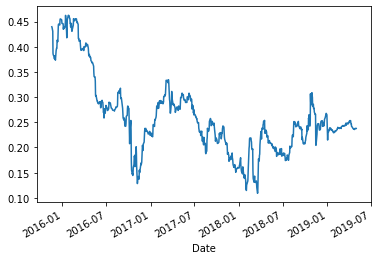

In [288]:
#Choose one portfolio, then calculate and plot beta it and the S&P 60 TSX.
 # Calculate covariance of all daily returns of ALGO1 vs. S&P 500
covariance = combined_df['ALGO 1'].rolling(window=180).cov(combined_df['S&P'])

# Calculate variance of all daily returns of ALGO vs S&P
variance = combined_df['ALGO 1'].rolling(window=180).var()

# Calculate beta of all daily returns of ALGO 1
(covariance / variance).plot()


In [269]:
#Plot Sharpe Ratio


In [270]:
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.




In [150]:
#Determine whether thAe algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In [295]:
# read Google Portfolio into dataframes 
goog_csv = Path("goog.csv")

goog = pd.read_csv(goog_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

goog.head()


,Close
Date,
2014-02-01 16:00:00,556.55
2014-03-01 16:00:00,552.50
2014-06-01 16:00:00,558.66
2014-07-01 16:00:00,569.42
2014-08-01 16:00:00,570.61


In [296]:
# read Amazon Portfolio into dataframes 
amzn_csv = Path("amzn.csv")

amzn = pd.read_csv(amzn_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

amzn.head()


,Close
Date,
2014-02-01 16:00:00,397.97
2014-03-01 16:00:00,396.44
2014-06-01 16:00:00,393.63
2014-07-01 16:00:00,398.03
2014-08-01 16:00:00,401.92


In [299]:
# read Apple Portfolio into dataframes 
aapl_csv = Path("aapl.csv")

aapl = pd.read_csv(aapl_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

aapl.head()

,Close
Date,
2014-02-01 16:00:00,19.75
2014-03-01 16:00:00,19.32
2014-06-01 16:00:00,19.43
2014-07-01 16:00:00,19.29
2014-08-01 16:00:00,19.41


In [300]:
 # Determining number of nulls
goog.isnull().sum()

Close    0
dtype: int64

In [301]:
 # Determining number of nulls
aapl.isnull().sum()

Close    0
dtype: int64

In [302]:
 # Determining number of nulls
amzn.isnull().sum()

Close    0
dtype: int64

In [303]:
combined_df2 = pd.concat([amzn,goog,aapl], axis="columns", join="inner")
#combined_df.setindex('Date')

In [304]:
combined_df2.head()

,Close,Close,Close
Date,,,
2014-02-01 16:00:00,397.97,556.55,19.75
2014-03-01 16:00:00,396.44,552.50,19.32
2014-06-01 16:00:00,393.63,558.66,19.43
2014-07-01 16:00:00,398.03,569.42,19.29
2014-08-01 16:00:00,401.92,570.61,19.41


In [305]:
combined_df2.columns = ['AMAZON', 'GOOGLE', 'APPLE']
combined_df2.head()
combined_df2

,AMAZON,GOOGLE,APPLE
Date,,,
2014-02-01 16:00:00,397.97,556.55,19.75
2014-03-01 16:00:00,396.44,552.50,19.32
2014-06-01 16:00:00,393.63,558.66,19.43
2014-07-01 16:00:00,398.03,569.42,19.29
2014-08-01 16:00:00,401.92,570.61,19.41
...,...,...,...
2014-12-23 16:00:00,306.29,529.14,28.14
2014-12-24 16:00:00,303.03,527.32,28.00
2014-12-26 16:00:00,309.09,532.57,28.50


In [307]:
#Performance Analysis 
# Plot daily returns of all portfolios
print(combined_df2.pct_change())

                       AMAZON    GOOGLE     APPLE
Date                                             
2014-02-01 16:00:00       NaN       NaN       NaN
2014-03-01 16:00:00 -0.003845 -0.007277 -0.021772
2014-06-01 16:00:00 -0.007088  0.011149  0.005694
2014-07-01 16:00:00  0.011178  0.019260 -0.007205
2014-08-01 16:00:00  0.009773  0.002090  0.006221
...                       ...       ...       ...
2014-12-23 16:00:00 -0.000816  0.010909 -0.003541
2014-12-24 16:00:00 -0.010644 -0.003440 -0.004975
2014-12-26 16:00:00  0.019998  0.009956  0.017857
2014-12-29 16:00:00  0.009544 -0.006929 -0.000702
2014-12-30 16:00:00 -0.005576  0.000170 -0.012289

[251 rows x 3 columns]


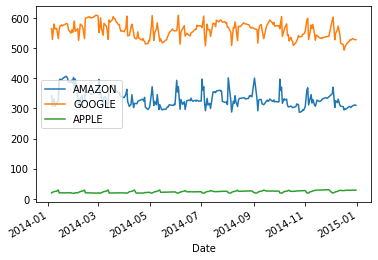

In [308]:
 # Calculate cumulative returns of all portfolios
 # Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns2 = (1 + combined_df2).cumprod() - 1
cumulative_returns2.head()
# Plot cumulative returns
combined_df2.plot()

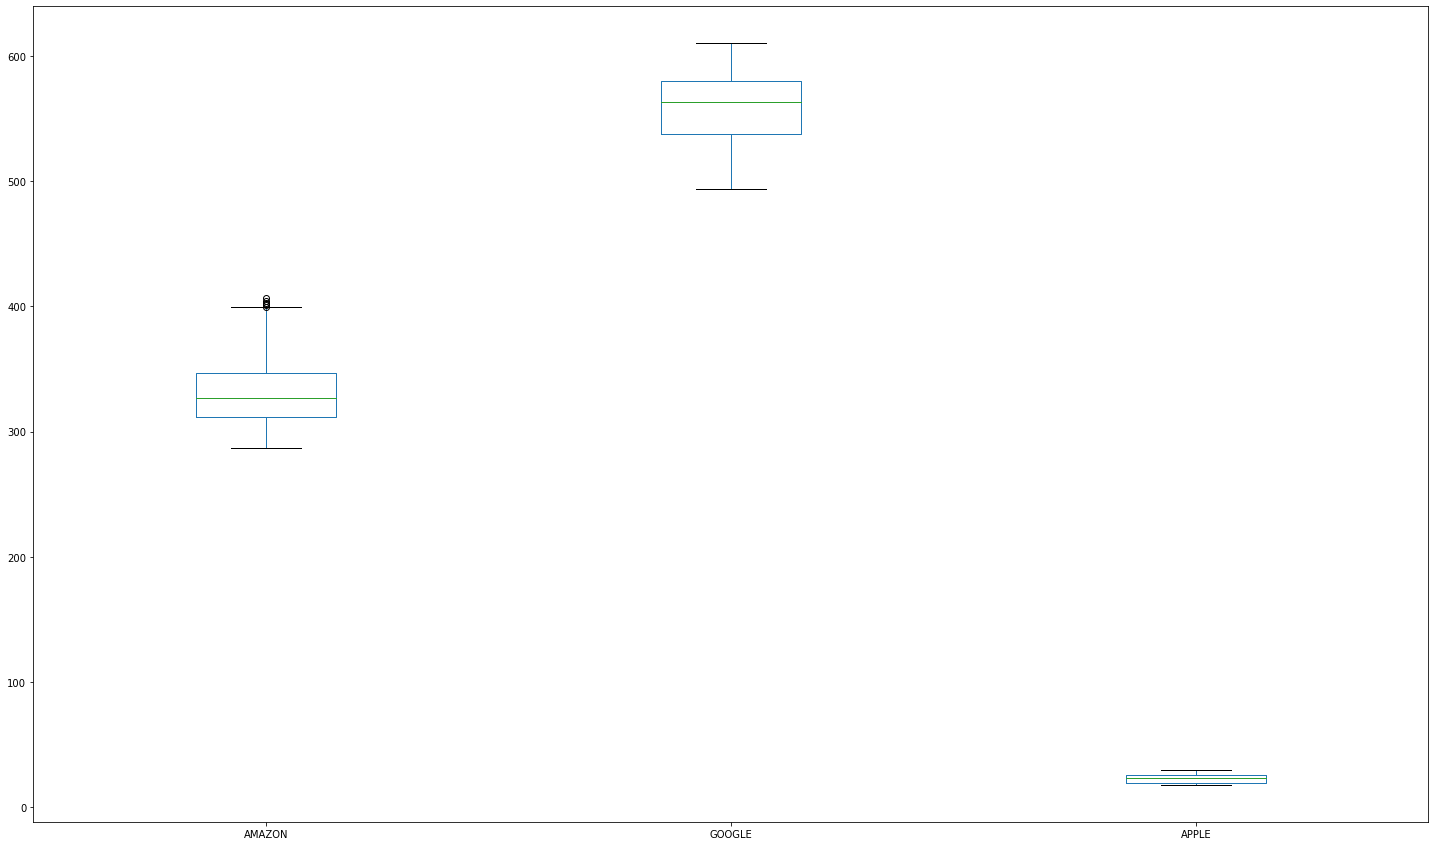

In [309]:
#Risk Analysis 
 # Box plot to visually show risk
ax2 = combined_df2.plot.box(figsize=(25,15));

In [310]:
#Calculate the standard deviation for each portfolio.
#S&P 
combined_df2.std()

AMAZON    27.684762
GOOGLE    26.342080
APPLE      3.338051
dtype: float64

In [312]:
#ALL PORTFOLIOS TOGETHER TO ANALYIZE RETURN
combined_df3 = pd.concat([combined_df,combined_df2], axis="columns", join="inner")
combined_df3.head()

,SOROS FUND MANAGEMENT,PAUL & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,S&P,AMAZON,GOOGLE,APPLE
Date,,,,,,,,,,
